<a href="https://colab.research.google.com/github/DinurakshanRavichandran/Visio-Glance/blob/Fundus-eye-disease-detection/ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Mount Google Drive

In [ ]:
# Mount Google Drive to access your dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Set Up Paths

In [ ]:
import os

# Define the path to your dataset directory on Google Drive
DATA_DIR = '/content/drive/MyDrive/data set/dataset'
# Define the categories (classes) in your dataset
CATEGORIES = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']



### Install Required Libraries

In [ ]:
# Install any missing packages (if necessary)
!pip install numpy pandas opencv-python-headless scikit-learn tensorflow matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 25.7 MB/s eta 0:00:00


###Load and Preprocess the Dataset

In [ ]:
import cv2
import numpy as np
import os

# Define image size and categories
IMG_SIZE = 224
CATEGORIES = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

def load_data(data_dir, categories, img_size):
    """Load images, resize them, and normalize pixel values."""
    images, labels = [], []

    # Loop through each category folder
    for category in categories:
        folder_path = os.path.join(data_dir, category)
        label = categories.index(category)

        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            try:
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (img_size, img_size))  # Resize to (224, 224)
                    img = img / 255.0  # Normalize to [0, 1]
                    images.append(img)
                    labels.append(label)
            except Exception as e:
                print(f"Error loading image {img_name}: {e}")

    return np.array(images), np.array(labels)

# Load the dataset
DATA_DIR = '/content/drive/MyDrive/data set/dataset'
X, y = load_data(DATA_DIR, CATEGORIES, IMG_SIZE)

# Ensure the data was loaded correctly
print(f"Loaded {len(X)} images with corresponding labels.")


Loaded 4228 images with corresponding labels.


###  Visualize a Sample of Your Dataset

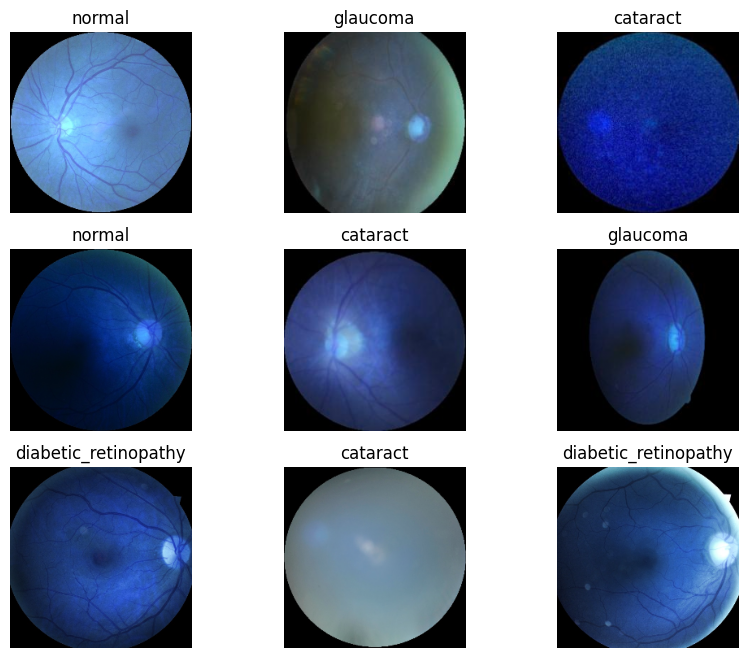

In [ ]:
import matplotlib.pyplot as plt
def visualize_samples(images, labels, categories):
    """Visualize random samples from the dataset."""
    plt.figure(figsize=(10, 8))
    for i in range(9):
        idx = np.random.randint(0, len(images))
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[idx])
        plt.title(categories[labels[idx]])
        plt.axis('off')
    plt.show()

# Visualize random samples from the dataset
visualize_samples(X, y, CATEGORIES)


###  Split the Dataset and Use Data Augmentation



In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}")

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)


Training samples: 3382, Validation samples: 846


### Use a Pre-trained Model for Transfer Learning

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

IMG_SIZE = 224

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(len(CATEGORIES), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


94765736/94765736 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                         

### Train the Model

In [ ]:
# Train the model using the augmented data generator
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=10  # You can adjust the number of epochs based on your dataset size
)
# Print the training and validation accuracy for each epoch
for epoch in range(len(history.history['accuracy'])):
    print(f"Epoch {epoch + 1}: Training Accuracy = {history.history['accuracy'][epoch]:.4f}, Validation Accuracy = {history.history['val_accuracy'][epoch]:.4f}")




Epoch 1/10
106/106 [==============================] - 74s 667ms/step - loss: 1.3816 - accuracy: 0.3108 - val_loss: 1.3135 - val_accuracy: 0.3511
Epoch 2/10
106/106 [==============================] - 68s 644ms/step - loss: 1.3619 - accuracy: 0.3238 - val_loss: 1.2817 - val_accuracy: 0.3960
Epoch 3/10
106/106 [==============================] - 69s 649ms/step - loss: 1.3223 - accuracy: 0.3666 - val_loss: 1.2777 - val_accuracy: 0.4125
Epoch 4/10
106/106 [==============================] - 69s 650ms/step - loss: 1.3131 - accuracy: 0.3755 - val_loss: 1.2599 - val_accuracy: 0.3983
Epoch 5/10
106/106 [==============================] - 70s 655ms/step - loss: 1.2972 - accuracy: 0.3995 - val_loss: 1.3176 - val_accuracy: 0.3440
Epoch 6/10
106/106 [==============================] - 69s 650ms/step - loss: 1.2865 - accuracy: 0.3956 - val_loss: 1.2598 - val_accuracy: 0.4397
Epoch 7/10
106/106 [==============================] - 69s 647ms/step - loss: 1.2791 - accuracy: 0.4024 - val_loss: 1.2403 - val_ac

### Print the training and validation accuracy

# Save the Model to Google Drive

In [ ]:
# Save the trained model to Google Drive for later use
model.save('/content/drive/MyDrive/eye_disease_detection_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###  Evaluating on the Validation Set (After Training accuracy)

In [ ]:
# Evaluate the model on the validation set
_, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy:.4f}")


27/27 [==============================] - 13s 496ms/step - loss: 1.2558 - accuracy: 0.4492
Validation Accuracy: 0.4492


###Make Predictions on New Images

In [ ]:
import tensorflow as tf

def predict_image(img_path, model_path, categories):
    """Make predictions on a new image using the saved model."""

    # Load the saved model
    model = tf.keras.models.load_model(model_path)

    # Load and preprocess the image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = np.expand_dims(img / 255.0, axis=0)  # Normalize and add batch dimension

    # Make a prediction
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions)
    return categories[predicted_class]

# Example usage to predict a new image using the saved model
model_path = '/content/drive/MyDrive/eye_disease_detection_model.h5'  # Path to your saved model
result = predict_image('/content/drive/MyDrive/Colab Notebooks/11.jpg.png', model_path, CATEGORIES)
print(f'Predicted Eye Disease: {result}')

1/1 [==============================] - 1s 927ms/step
Predicted Eye Disease: cataract
